#### 셀레니움 크롤링 결과로 분석

##### 데이터 로드, 전처리

In [28]:
import matplotlib
from matplotlib import pyplot as plt
# import matplotlib.pyplot as plt
from matplotlib import font_manager, rc, rcParams
import seaborn as sns

font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
font = font_manager.FontProperties(fname=font_path).get_name() # 나눔고딕, 'NanumGothic'
rc('font', family=font)
rcParams['axes.unicode_minus'] = False

In [29]:
# 추가 라이브러리 임포트
import pandas as pd
import numpy as np

In [30]:
# 데이터 로드
df = pd.read_excel('./1_crawling_jejudoHotplaces.xlsx')
df

,content,data,like,place,tags
0,arcco_iris_저희가 제주 공항 출발할때 가장 먼저 입었던 코디 !-은은하게 ...,2023-06-28,1306,NaN,[]
1,"beli._azagi._u(광고)애월에서 가성비 좋은 흑돼지 전문점을 찾는다면 ""애...",2023-06-29,0,애월읍 애월해안로 97,"['#제주애월맛집', '#애월맛집', '#제주도흑돼지맛집', '#제주흑돼지맛집', ..."
2,osun_23오늘도 정시에 오픈했어용😊 정성 가득 담아 준비했어요🥰 식사하러 오세용...,2023-06-29,3,NaN,"['#선흘리맛집', '#함덕맛집', '#제주도맛집', '#조천읍맛집', '#흑돼지두..."
3,luna.player여자들은 공감함 ㅋㅋㅋㅋㅋㅋㅋ (광고)━━━━━━━━━━━━━━...,2023-06-27,825,NaN,"['#유머스타그램', '#유머저장소', '#웃긴짤', '#웃긴영상', '#웃긴사진'..."
4,nato.tving@@ 이렇게 자는 사람?? ㅋㅋㅋㅋㅋㅋㅋㅋ (광고)━━━━━━━━...,2023-06-26,892,NaN,"['#유머스타그램', '#유머저장소', '#웃긴짤', '#웃긴영상', '#웃긴사진'..."
...,...,...,...,...,...
495,_astorstrans(광고)제주도에서 쓰끼다시가 가장 잘나오고 서귀포에서 오션뷰로...,2023-06-28,0,서귀포시 대포로 16111,"['#서귀포맛집', '#제주중문맛집', '#서귀포횟집', '#중문횟집', '#제주도..."
496,hamdeok42안녕하세요 함사입니다 :)오늘은 하늘이 예뻐서 비행기 구경하러 스탭...,2023-06-28,31,NaN,"['#시로코', '#함덕사이게스트하우스-------------------------..."
497,leonila_waid2023(협찬) @cafe_the_light_jeju💗제주도에...,2023-06-28,1082,성산읍 한도로 269,"['#제주여행', '#제주카페', '#성산일출봉카페', '#제주카페추천', '#제주..."
498,_bi._ply_w__(리그램) @dotoree_jeju두둥 ! 맛집러들 다 모여📢...,2023-06-28,0,제주시 북성로 59,"['#제주공항근처맛집', '#제주공항근처맛집추천', '#제주맛집', '#제주맛집추천..."


In [31]:
# 중복제거 - content 컬럼 기준
# df.drop_duplicates(subset=['content'], inplace=True)
jeju_df = df.drop_duplicates(subset=['content'])

In [32]:
# 중복데이터 35개 삭제
jeju_df.reset_index(drop=True)
jeju_df

,content,data,like,place,tags
0,arcco_iris_저희가 제주 공항 출발할때 가장 먼저 입었던 코디 !-은은하게 ...,2023-06-28,1306,NaN,[]
1,"beli._azagi._u(광고)애월에서 가성비 좋은 흑돼지 전문점을 찾는다면 ""애...",2023-06-29,0,애월읍 애월해안로 97,"['#제주애월맛집', '#애월맛집', '#제주도흑돼지맛집', '#제주흑돼지맛집', ..."
2,osun_23오늘도 정시에 오픈했어용😊 정성 가득 담아 준비했어요🥰 식사하러 오세용...,2023-06-29,3,NaN,"['#선흘리맛집', '#함덕맛집', '#제주도맛집', '#조천읍맛집', '#흑돼지두..."
3,luna.player여자들은 공감함 ㅋㅋㅋㅋㅋㅋㅋ (광고)━━━━━━━━━━━━━━...,2023-06-27,825,NaN,"['#유머스타그램', '#유머저장소', '#웃긴짤', '#웃긴영상', '#웃긴사진'..."
4,nato.tving@@ 이렇게 자는 사람?? ㅋㅋㅋㅋㅋㅋㅋㅋ (광고)━━━━━━━━...,2023-06-26,892,NaN,"['#유머스타그램', '#유머저장소', '#웃긴짤', '#웃긴영상', '#웃긴사진'..."
...,...,...,...,...,...
495,_astorstrans(광고)제주도에서 쓰끼다시가 가장 잘나오고 서귀포에서 오션뷰로...,2023-06-28,0,서귀포시 대포로 16111,"['#서귀포맛집', '#제주중문맛집', '#서귀포횟집', '#중문횟집', '#제주도..."
496,hamdeok42안녕하세요 함사입니다 :)오늘은 하늘이 예뻐서 비행기 구경하러 스탭...,2023-06-28,31,NaN,"['#시로코', '#함덕사이게스트하우스-------------------------..."
497,leonila_waid2023(협찬) @cafe_the_light_jeju💗제주도에...,2023-06-28,1082,성산읍 한도로 269,"['#제주여행', '#제주카페', '#성산일출봉카페', '#제주카페추천', '#제주..."
498,_bi._ply_w__(리그램) @dotoree_jeju두둥 ! 맛집러들 다 모여📢...,2023-06-28,0,제주시 북성로 59,"['#제주공항근처맛집', '#제주공항근처맛집추천', '#제주맛집', '#제주맛집추천..."


##### 전처리 중간

- tags, place로 dropna, 결측치 제거 필요할 수 있음
- 숫자로 통계를 내는 게 아니면 결측치 제거는 옵션

##### 워드 클라우드

- 글자를 구름형태로 표현한 것
<img src='https://'> 워드 클라우드 사진 넣기

In [33]:
jeju_df

,content,data,like,place,tags
0,arcco_iris_저희가 제주 공항 출발할때 가장 먼저 입었던 코디 !-은은하게 ...,2023-06-28,1306,NaN,[]
1,"beli._azagi._u(광고)애월에서 가성비 좋은 흑돼지 전문점을 찾는다면 ""애...",2023-06-29,0,애월읍 애월해안로 97,"['#제주애월맛집', '#애월맛집', '#제주도흑돼지맛집', '#제주흑돼지맛집', ..."
2,osun_23오늘도 정시에 오픈했어용😊 정성 가득 담아 준비했어요🥰 식사하러 오세용...,2023-06-29,3,NaN,"['#선흘리맛집', '#함덕맛집', '#제주도맛집', '#조천읍맛집', '#흑돼지두..."
3,luna.player여자들은 공감함 ㅋㅋㅋㅋㅋㅋㅋ (광고)━━━━━━━━━━━━━━...,2023-06-27,825,NaN,"['#유머스타그램', '#유머저장소', '#웃긴짤', '#웃긴영상', '#웃긴사진'..."
4,nato.tving@@ 이렇게 자는 사람?? ㅋㅋㅋㅋㅋㅋㅋㅋ (광고)━━━━━━━━...,2023-06-26,892,NaN,"['#유머스타그램', '#유머저장소', '#웃긴짤', '#웃긴영상', '#웃긴사진'..."
...,...,...,...,...,...
495,_astorstrans(광고)제주도에서 쓰끼다시가 가장 잘나오고 서귀포에서 오션뷰로...,2023-06-28,0,서귀포시 대포로 16111,"['#서귀포맛집', '#제주중문맛집', '#서귀포횟집', '#중문횟집', '#제주도..."
496,hamdeok42안녕하세요 함사입니다 :)오늘은 하늘이 예뻐서 비행기 구경하러 스탭...,2023-06-28,31,NaN,"['#시로코', '#함덕사이게스트하우스-------------------------..."
497,leonila_waid2023(협찬) @cafe_the_light_jeju💗제주도에...,2023-06-28,1082,성산읍 한도로 269,"['#제주여행', '#제주카페', '#성산일출봉카페', '#제주카페추천', '#제주..."
498,_bi._ply_w__(리그램) @dotoree_jeju두둥 ! 맛집러들 다 모여📢...,2023-06-28,0,제주시 북성로 59,"['#제주공항근처맛집', '#제주공항근처맛집추천', '#제주맛집', '#제주맛집추천..."


In [34]:
jeju_df['tags'][:5]

0                                                   []
1    ['#제주애월맛집', '#애월맛집', '#제주도흑돼지맛집', '#제주흑돼지맛집', ...
2    ['#선흘리맛집', '#함덕맛집', '#제주도맛집', '#조천읍맛집', '#흑돼지두...
3    ['#유머스타그램', '#유머저장소', '#웃긴짤', '#웃긴영상', '#웃긴사진'...
4    ['#유머스타그램', '#유머저장소', '#웃긴짤', '#웃긴영상', '#웃긴사진'...
Name: tags, dtype: object

In [35]:
# 해시태그 모으기
tags_total = []

for tags in jeju_df['tags']: # 하나하나가 리스트
    tags_list = tags[2:-2].split("', '") # [2:-2] ==> [', '] 를 제거
    for tag in tags_list:
        if tag != '': # 빈태그 삭제
            if tag.find('\\u200b'): # 유니코드 space tag 삭제처리
                tags_total.append(tag.split('\\u200b')[0])
            else :
                tags_total.append(tag) 
len(tags_total)

6386

In [36]:
# 해시태그 출현빈도 집계
from collections import Counter
tags_counts = Counter(tags_total)

In [37]:
tags_counts.most_common(50)

[('#제주도맛집', 311),
 ('#제주맛집', 211),
 ('#애월맛집', 95),
 ('#제주여행', 94),
 ('#제주도', 94),
 ('#제주시맛집', 83),
 ('#제주도맛집추천', 73),
 ('#서귀포맛집', 71),
 ('#제주', 67),
 ('#제주가볼만한곳', 60),
 ('#제주도민맛집', 59),
 ('#제주공항근처맛집', 58),
 ('#제주카페', 57),
 ('#제주도여행', 57),
 ('#제주맛집추천', 54),
 ('#제주공항맛집', 51),
 ('#중문맛집', 51),
 ('#제주도카페', 49),
 ('#제주흑돼지맛집', 45),
 ('#제주흑돼지', 44),
 ('#제주중문맛집', 42),
 ('#제주도횟집', 42),
 ('#제주횟집', 42),
 ('#제주맛집투어', 39),
 ('#제주오션뷰맛집', 39),
 ('#서귀포맛집추천', 39),
 ('#서귀포횟집', 38),
 ('#중문횟집', 38),
 ('#애월해안도로맛집', 37),
 ('#제주여행코스', 36),
 ('#제주도흑돼지맛집', 35),
 ('#제주도흑돼지', 35),
 ('#한림맛집', 33),
 ('#애월가볼만한곳', 32),
 ('#곽지맛집', 31),
 ('#제주돈까스', 31),
 ('#곽지해수욕장맛집', 30),
 ('#협재흑돼지', 30),
 ('#제주카페추천', 29),
 ('#애월맛집추천', 29),
 ('#제주파스타', 29),
 ('#제주도맛집투어', 28),
 ('#새별오름', 28),
 ('#제주한림맛집', 27),
 ('#제주공항근처맛집추천', 25),
 ('#제주맛집탐방', 25),
 ('#제주도맛집베스트', 25),
 ('#제주시맛집추천', 25),
 ('#제주살이', 24),
 ('#한림흑돼지', 24)]

##### 데이터 정제

해시태그 중 맛집과 관련없는 태그 삭제

In [38]:
delwords = ['#제주여행', '#제주도', '#제주', '#제주가볼만한곳', '#제주도여행', '#제주여행코스', '#애월가볼만한곳', '#새별오름', '#제주살이', '#제주해저',
            '#제주데이트', '#맞팔', '#제주도날씨', '#여행', '#제주일상', '#제주도가볼만한곳', '#제주도가족여행', '#jeju', '#아는형님게스트하우스',
             '#서울맛집' ]
total_tags =[]
for tag in tags_total:
    if tag not in delwords:
        total_tags.append(tag)
total_tags_counts = Counter(total_tags)
total_tags_counts.most_common(71)

[('#제주도맛집', 311),
 ('#제주맛집', 211),
 ('#애월맛집', 95),
 ('#제주시맛집', 83),
 ('#제주도맛집추천', 73),
 ('#서귀포맛집', 71),
 ('#제주도민맛집', 59),
 ('#제주공항근처맛집', 58),
 ('#제주카페', 57),
 ('#제주맛집추천', 54),
 ('#제주공항맛집', 51),
 ('#중문맛집', 51),
 ('#제주도카페', 49),
 ('#제주흑돼지맛집', 45),
 ('#제주흑돼지', 44),
 ('#제주중문맛집', 42),
 ('#제주도횟집', 42),
 ('#제주횟집', 42),
 ('#제주맛집투어', 39),
 ('#제주오션뷰맛집', 39),
 ('#서귀포맛집추천', 39),
 ('#서귀포횟집', 38),
 ('#중문횟집', 38),
 ('#애월해안도로맛집', 37),
 ('#제주도흑돼지맛집', 35),
 ('#제주도흑돼지', 35),
 ('#한림맛집', 33),
 ('#곽지맛집', 31),
 ('#제주돈까스', 31),
 ('#곽지해수욕장맛집', 30),
 ('#협재흑돼지', 30),
 ('#제주카페추천', 29),
 ('#애월맛집추천', 29),
 ('#제주파스타', 29),
 ('#제주도맛집투어', 28),
 ('#제주한림맛집', 27),
 ('#제주공항근처맛집추천', 25),
 ('#제주맛집탐방', 25),
 ('#제주도맛집베스트', 25),
 ('#제주시맛집추천', 25),
 ('#한림흑돼지', 24),
 ('#한림흑돼지맛집', 24),
 ('#협재흑돼지맛집', 24),
 ('#한림고기맛집', 24),
 ('#애월고기맛집', 24),
 ('#제주노을맛집', 24),
 ('#성산일출봉카페', 23),
 ('#애월카페', 22),
 ('#맛집', 20),
 ('#제주애월맛집', 19),
 ('#제주핫플', 19),
 ('#성산맛집', 18),
 ('#성산카페', 16),
 ('#제주핫플레이스', 16),
 ('#먹팔', 16),
 ('#제주루프탑카페', 15),
 ('#제주서귀

In [39]:
# 막대차트 그리기 준비
tags_df = pd.DataFrame(total_tags_counts.most_common(71))
tags_df.columns = ['태그', '빈도수']
tags_df

,태그,빈도수
0,#제주도맛집,311
1,#제주맛집,211
2,#애월맛집,95
3,#제주시맛집,83
4,#제주도맛집추천,73
...,...,...
66,#서귀포카페,10
67,#산방산맛집,10
68,#제주도집밥,10
69,#제주아침식사,10


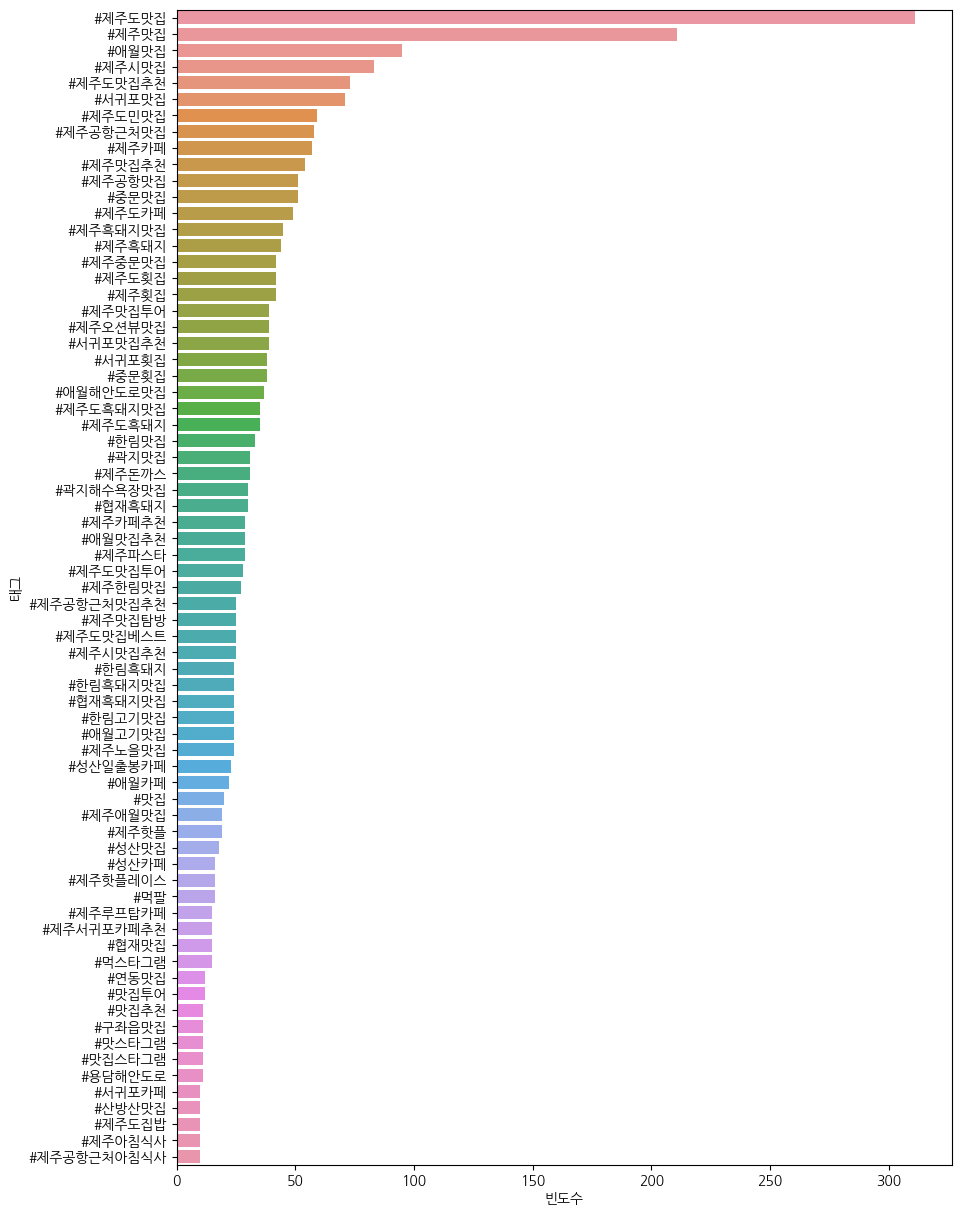

In [40]:
# 막대차트
plt.figure(figsize=(10, 15))
sns.barplot(x='빈도수', y='태그', data=tags_df)
plt.show()

##### 워드클라우드

```python
!pip install wordcloud
```

In [41]:
!pip install wordcloud

In [42]:
dict(total_tags_counts.most_common(71))

{'#제주도맛집': 311,
 '#제주맛집': 211,
 '#애월맛집': 95,
 '#제주시맛집': 83,
 '#제주도맛집추천': 73,
 '#서귀포맛집': 71,
 '#제주도민맛집': 59,
 '#제주공항근처맛집': 58,
 '#제주카페': 57,
 '#제주맛집추천': 54,
 '#제주공항맛집': 51,
 '#중문맛집': 51,
 '#제주도카페': 49,
 '#제주흑돼지맛집': 45,
 '#제주흑돼지': 44,
 '#제주중문맛집': 42,
 '#제주도횟집': 42,
 '#제주횟집': 42,
 '#제주맛집투어': 39,
 '#제주오션뷰맛집': 39,
 '#서귀포맛집추천': 39,
 '#서귀포횟집': 38,
 '#중문횟집': 38,
 '#애월해안도로맛집': 37,
 '#제주도흑돼지맛집': 35,
 '#제주도흑돼지': 35,
 '#한림맛집': 33,
 '#곽지맛집': 31,
 '#제주돈까스': 31,
 '#곽지해수욕장맛집': 30,
 '#협재흑돼지': 30,
 '#제주카페추천': 29,
 '#애월맛집추천': 29,
 '#제주파스타': 29,
 '#제주도맛집투어': 28,
 '#제주한림맛집': 27,
 '#제주공항근처맛집추천': 25,
 '#제주맛집탐방': 25,
 '#제주도맛집베스트': 25,
 '#제주시맛집추천': 25,
 '#한림흑돼지': 24,
 '#한림흑돼지맛집': 24,
 '#협재흑돼지맛집': 24,
 '#한림고기맛집': 24,
 '#애월고기맛집': 24,
 '#제주노을맛집': 24,
 '#성산일출봉카페': 23,
 '#애월카페': 22,
 '#맛집': 20,
 '#제주애월맛집': 19,
 '#제주핫플': 19,
 '#성산맛집': 18,
 '#성산카페': 16,
 '#제주핫플레이스': 16,
 '#먹팔': 16,
 '#제주루프탑카페': 15,
 '#제주서귀포카페추천': 15,
 '#협재맛집': 15,
 '#먹스타그램': 15,
 '#연동맛집': 12,
 '#맛집투어': 12,
 '#맛집추천': 11,
 '#구좌읍맛집': 11,
 '#맛스타그램': 11,


In [43]:
# # 워드클라우드 한글 문제해결
# from wordcloud import WordCloud
# from PIL import Image, ImageOps

# font_path = 'C:/Windows/Fonts/BlackHanSans-Regular.ttf'

# tag_last = dict(total_tags_counts.most_common(71))

# mask = np.array(Image.open('./KakaoTalk_20230630_111108591.png'))

# wc = WordCloud(mask = mask, font_path = font_path, colormap = 'inferno', background_color = 'lightgray', max_words = 100, relative_scaling = 0.3, width = 900, height = 500).generate_from_frequencies(tag_last)

# plt.figure(figsize=(15, 10))
# plt.imshow(wc)
# plt.axis('off')
# plt.show()


In [44]:
# 워드클라우드 한글 문제해결
from wordcloud import WordCloud
from PIL import Image, ImageOps

# 경기천년제목체로 변경
font_path = 'C:/Windows/Fonts/경기천년제목V_Bold.ttf'
tags_last = dict(total_tags_counts.most_common(71))

original_mask = np.array(Image.open('./cloud3.png')) # width 1024로 확장
original_mask[original_mask.sum(axis=2) == 0] = 255 # 마스크이미지 값이 여백이 255가되어야 하는데 여백값이 0이 된것을 변환

wc = WordCloud(mask=original_mask, font_path=font_path, colormap='inferno', background_color='white', max_words=100, relative_scaling=0.3,
               width=900, height=600).generate_from_frequencies(tags_last)
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig('./제주맛집_워드클라우드.png')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Windows/Fonts/경기천년제목V_Bold.ttf'

In [ ]:
# 이미지 마스킹 처리 중간단계 로직
cloud_mask = np.array(Image.open('./cloud2.png'))
cloud_mask[cloud_mask.sum(axis=2) == 0] = 255
cloud_mask

In [ ]:
wc = WordCloud(mask=cloud_mask, font_path=font_path, colormap='inferno', background_color='white', max_words=100, relative_scaling=0.3,
               width=900, height=500).generate_from_frequencies(tags_last)
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

##### 지도 시각화

##### 위치정보로 지도위에 위치 마킹

In [ ]:
# 데이터 재로드
raw_total = pd.read_excel('./1_crawling_jejudoHotplaces.xlsx', header=0)
raw_total.head()

,content,data,like,place,tags
0,arcco_iris_저희가 제주 공항 출발할때 가장 먼저 입었던 코디 !-은은하게 ...,2023-06-28,1306,NaN,[]
1,"beli._azagi._u(광고)애월에서 가성비 좋은 흑돼지 전문점을 찾는다면 ""애...",2023-06-29,0,애월읍 애월해안로 97,"['#제주애월맛집', '#애월맛집', '#제주도흑돼지맛집', '#제주흑돼지맛집', ..."
2,osun_23오늘도 정시에 오픈했어용😊 정성 가득 담아 준비했어요🥰 식사하러 오세용...,2023-06-29,3,NaN,"['#선흘리맛집', '#함덕맛집', '#제주도맛집', '#조천읍맛집', '#흑돼지두..."
3,luna.player여자들은 공감함 ㅋㅋㅋㅋㅋㅋㅋ (광고)━━━━━━━━━━━━━━...,2023-06-27,825,NaN,"['#유머스타그램', '#유머저장소', '#웃긴짤', '#웃긴영상', '#웃긴사진'..."
4,nato.tving@@ 이렇게 자는 사람?? ㅋㅋㅋㅋㅋㅋㅋㅋ (광고)━━━━━━━━...,2023-06-26,892,NaN,"['#유머스타그램', '#유머저장소', '#웃긴짤', '#웃긴영상', '#웃긴사진'..."


In [ ]:
# 위치정보만 가져오기
temp = raw_total['place'] # temp 시리즈 생성
temp.rename(None, inplace=True) # 시리즈에서 place라는 이름은 삭제
temp.value_counts() # 확인

In [ ]:
location_count_df = pd.DataFrame(temp.value_counts())
location_count_df

,count
서귀포시 대포로 16111,39
대정읍 무릉사장로 154,33
애월읍 애월로 129,30
제주시 북성로 59,25
한립읍 귀덕리 4169-3,24
...,...
성산읍 고성오조로 84-1,1
한림읍 한림로 339,1
제주시 서문로 6,1
애월읍 항파두리로 148,1


In [ ]:
# 위치빈도값 저장
location_count_df.to_excel('./location_count.xlsx')

In [ ]:
locations = list(location_count_df.index)
locations[0] = '서귀포시 대포로 161' # 첫 번째 주소의 16111 주소 번호를 161로 변경

In [ ]:
locations

##### 카카오 API 사용 주소에 대한 위경도값, 추가정보 가져오기

In [45]:
url = f'https://dapi.kakao.com/v2/local/search/address.json?query={"성산읍 한도로 269"}'
hdr = {
    'Authorization': 'KakaoAK 9e13a6d13c7e2e0aca525da1dccbabff'
}
data = []
places = requests.get(url, headers=hdr).json()['documents']
places

NameError: name 'requests' is not defined

In [ ]:
!pip install tqdm

                                              0.0/77.1 kB ? eta -:--:--
     ---------------------------------------- 77.1/77.1 kB 4.5 MB/s eta 0:00:00


In [ ]:
!pip install folium

                                              0.0/102.3 kB ? eta -:--:--
     ----                                     10.2/102.3 kB ? eta -:--:--
     -------------------------------------- 102.3/102.3 kB 1.5 MB/s eta 0:00:00
